In [1]:
# Import dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude comibinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Import citipy.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count.
len(cities)

626

In [6]:
# Import Requests Library and the weather_api_key.
import requests
from config import weather_api_key

In [7]:
# Build the basic URL for the OpenWeatherMap with your weather_api_key added to the URL.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the time library and the datetime module from the datetime library.
import time
from datetime import datetime

In [12]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()

        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})
# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | karuzi
Processing Record 2 of Set 1 | bandarbeyla
Processing Record 3 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 6 of Set 1 | new norfolk
Processing Record 7 of Set 1 | celles
Processing Record 8 of Set 1 | nanortalik
Processing Record 9 of Set 1 | hasaki
Processing Record 10 of Set 1 | inta
Processing Record 11 of Set 1 | baijiantan
Processing Record 12 of Set 1 | touros
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | banda aceh
Processing Record 15 of Set 1 | labutta
City not found. Skipping...
Processing Record 16 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 17 of Set 1 | guekedou
City not found. Skipping...
Processing Record 18 of Set 1 | mataura
Processing Record 19 of Set 1 | bengkulu
Processing Record 20 of

Processing Record 38 of Set 4 | hobart
Processing Record 39 of Set 4 | dno
Processing Record 40 of Set 4 | la rioja
Processing Record 41 of Set 4 | tazmalt
Processing Record 42 of Set 4 | kodiak
Processing Record 43 of Set 4 | lasa
Processing Record 44 of Set 4 | dezhou
Processing Record 45 of Set 4 | vestmannaeyjar
Processing Record 46 of Set 4 | phumi samraong
City not found. Skipping...
Processing Record 47 of Set 4 | batemans bay
Processing Record 48 of Set 4 | rochegda
Processing Record 49 of Set 4 | samarai
Processing Record 50 of Set 4 | zhezkazgan
Processing Record 1 of Set 5 | taoudenni
Processing Record 2 of Set 5 | narsaq
Processing Record 3 of Set 5 | kirkuk
Processing Record 4 of Set 5 | balingen
Processing Record 5 of Set 5 | naze
Processing Record 6 of Set 5 | mahajanga
Processing Record 7 of Set 5 | tuni
Processing Record 8 of Set 5 | sur
Processing Record 9 of Set 5 | imbituba
Processing Record 10 of Set 5 | sitka
Processing Record 11 of Set 5 | faya
Processing Record 

Processing Record 27 of Set 8 | ocos
Processing Record 28 of Set 8 | pimentel
Processing Record 29 of Set 8 | puerto del rosario
Processing Record 30 of Set 8 | kamaishi
Processing Record 31 of Set 8 | pokhara
Processing Record 32 of Set 8 | wanaka
Processing Record 33 of Set 8 | upernavik
Processing Record 34 of Set 8 | medina
Processing Record 35 of Set 8 | jackson
Processing Record 36 of Set 8 | ekhabi
Processing Record 37 of Set 8 | chimore
Processing Record 38 of Set 8 | tuy hoa
Processing Record 39 of Set 8 | santa eulalia del rio
City not found. Skipping...
Processing Record 40 of Set 8 | jatai
Processing Record 41 of Set 8 | yeppoon
Processing Record 42 of Set 8 | moron
Processing Record 43 of Set 8 | cherbourg
Processing Record 44 of Set 8 | san cosme y damian
Processing Record 45 of Set 8 | wilmette
Processing Record 46 of Set 8 | margate
Processing Record 47 of Set 8 | wulanhaote
City not found. Skipping...
Processing Record 48 of Set 8 | inirida
Processing Record 49 of Set 

Processing Record 16 of Set 12 | sioux lookout
Processing Record 17 of Set 12 | guerrero negro
Processing Record 18 of Set 12 | machico
Processing Record 19 of Set 12 | okha
Processing Record 20 of Set 12 | dzhebariki-khaya
Processing Record 21 of Set 12 | mecca
Processing Record 22 of Set 12 | jumla
Processing Record 23 of Set 12 | namibe
Processing Record 24 of Set 12 | mancio lima
Processing Record 25 of Set 12 | khingansk
Processing Record 26 of Set 12 | omsukchan
Processing Record 27 of Set 12 | yefira
City not found. Skipping...
Processing Record 28 of Set 12 | shakhtinsk
Processing Record 29 of Set 12 | labuhan
Processing Record 30 of Set 12 | cao bang
Processing Record 31 of Set 12 | vermilion
Processing Record 32 of Set 12 | roebourne
Processing Record 33 of Set 12 | tiarei
Processing Record 34 of Set 12 | palmer
Processing Record 35 of Set 12 | sabang
Processing Record 36 of Set 12 | ambulu
Processing Record 37 of Set 12 | camacha
Processing Record 38 of Set 12 | kruisfontein

In [13]:
# Tally the number of cities in the city_data array of dictionaries using the len() function.
len(city_data)

578

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Karuzi,-3.1250,30.1333,79.21,31,71,7.34,BI,2022-07-22 12:33:08
1,Bandarbeyla,9.4942,50.8122,80.28,71,100,32.21,SO,2022-07-22 12:33:09
2,Rikitea,-23.1203,-134.9692,72.30,80,100,8.14,PF,2022-07-22 12:32:47
3,New Norfolk,-42.7826,147.0587,49.50,97,100,2.95,AU,2022-07-22 12:33:09
4,Celles,50.7123,3.4573,72.99,59,100,1.99,BE,2022-07-22 12:33:10
5,Nanortalik,60.1432,-45.2371,48.22,79,22,4.56,GL,2022-07-22 12:33:10
6,Hasaki,35.7333,140.8333,81.28,91,52,19.75,JP,2022-07-22 12:33:11
7,Inta,66.0317,60.1659,51.26,64,100,7.07,RU,2022-07-22 12:33:11
8,Baijiantan,45.6333,85.1833,102.15,12,46,15.64,CN,2022-07-22 12:33:11
9,Touros,-5.1989,-35.4608,79.79,74,76,11.68,BR,2022-07-22 12:28:53


In [17]:
# Reorder the columns in the city_data_df.
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Karuzi,BI,2022-07-22 12:33:08,-3.1250,30.1333,79.21,31,71,7.34
1,Bandarbeyla,SO,2022-07-22 12:33:09,9.4942,50.8122,80.28,71,100,32.21
2,Rikitea,PF,2022-07-22 12:32:47,-23.1203,-134.9692,72.30,80,100,8.14
3,New Norfolk,AU,2022-07-22 12:33:09,-42.7826,147.0587,49.50,97,100,2.95
4,Celles,BE,2022-07-22 12:33:10,50.7123,3.4573,72.99,59,100,1.99
5,Nanortalik,GL,2022-07-22 12:33:10,60.1432,-45.2371,48.22,79,22,4.56
6,Hasaki,JP,2022-07-22 12:33:11,35.7333,140.8333,81.28,91,52,19.75
7,Inta,RU,2022-07-22 12:33:11,66.0317,60.1659,51.26,64,100,7.07
8,Baijiantan,CN,2022-07-22 12:33:11,45.6333,85.1833,102.15,12,46,15.64
9,Touros,BR,2022-07-22 12:28:53,-5.1989,-35.4608,79.79,74,76,11.68


In [18]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [19]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

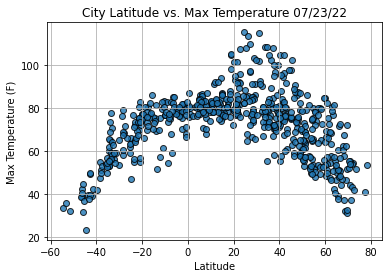

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label = "Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

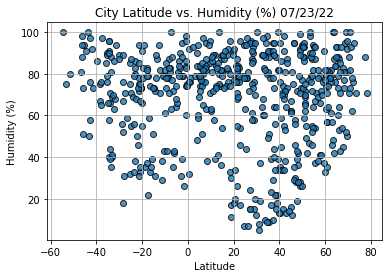

In [24]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label = "Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity (%) "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

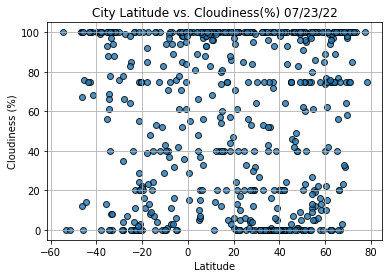

In [23]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label = "Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness(%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

In [25]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label = "Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph))
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

SyntaxError: EOL while scanning string literal (748744046.py, line 9)